### Классификация методом k ближайших соседей и окна Парзена

In [73]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [74]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=True)

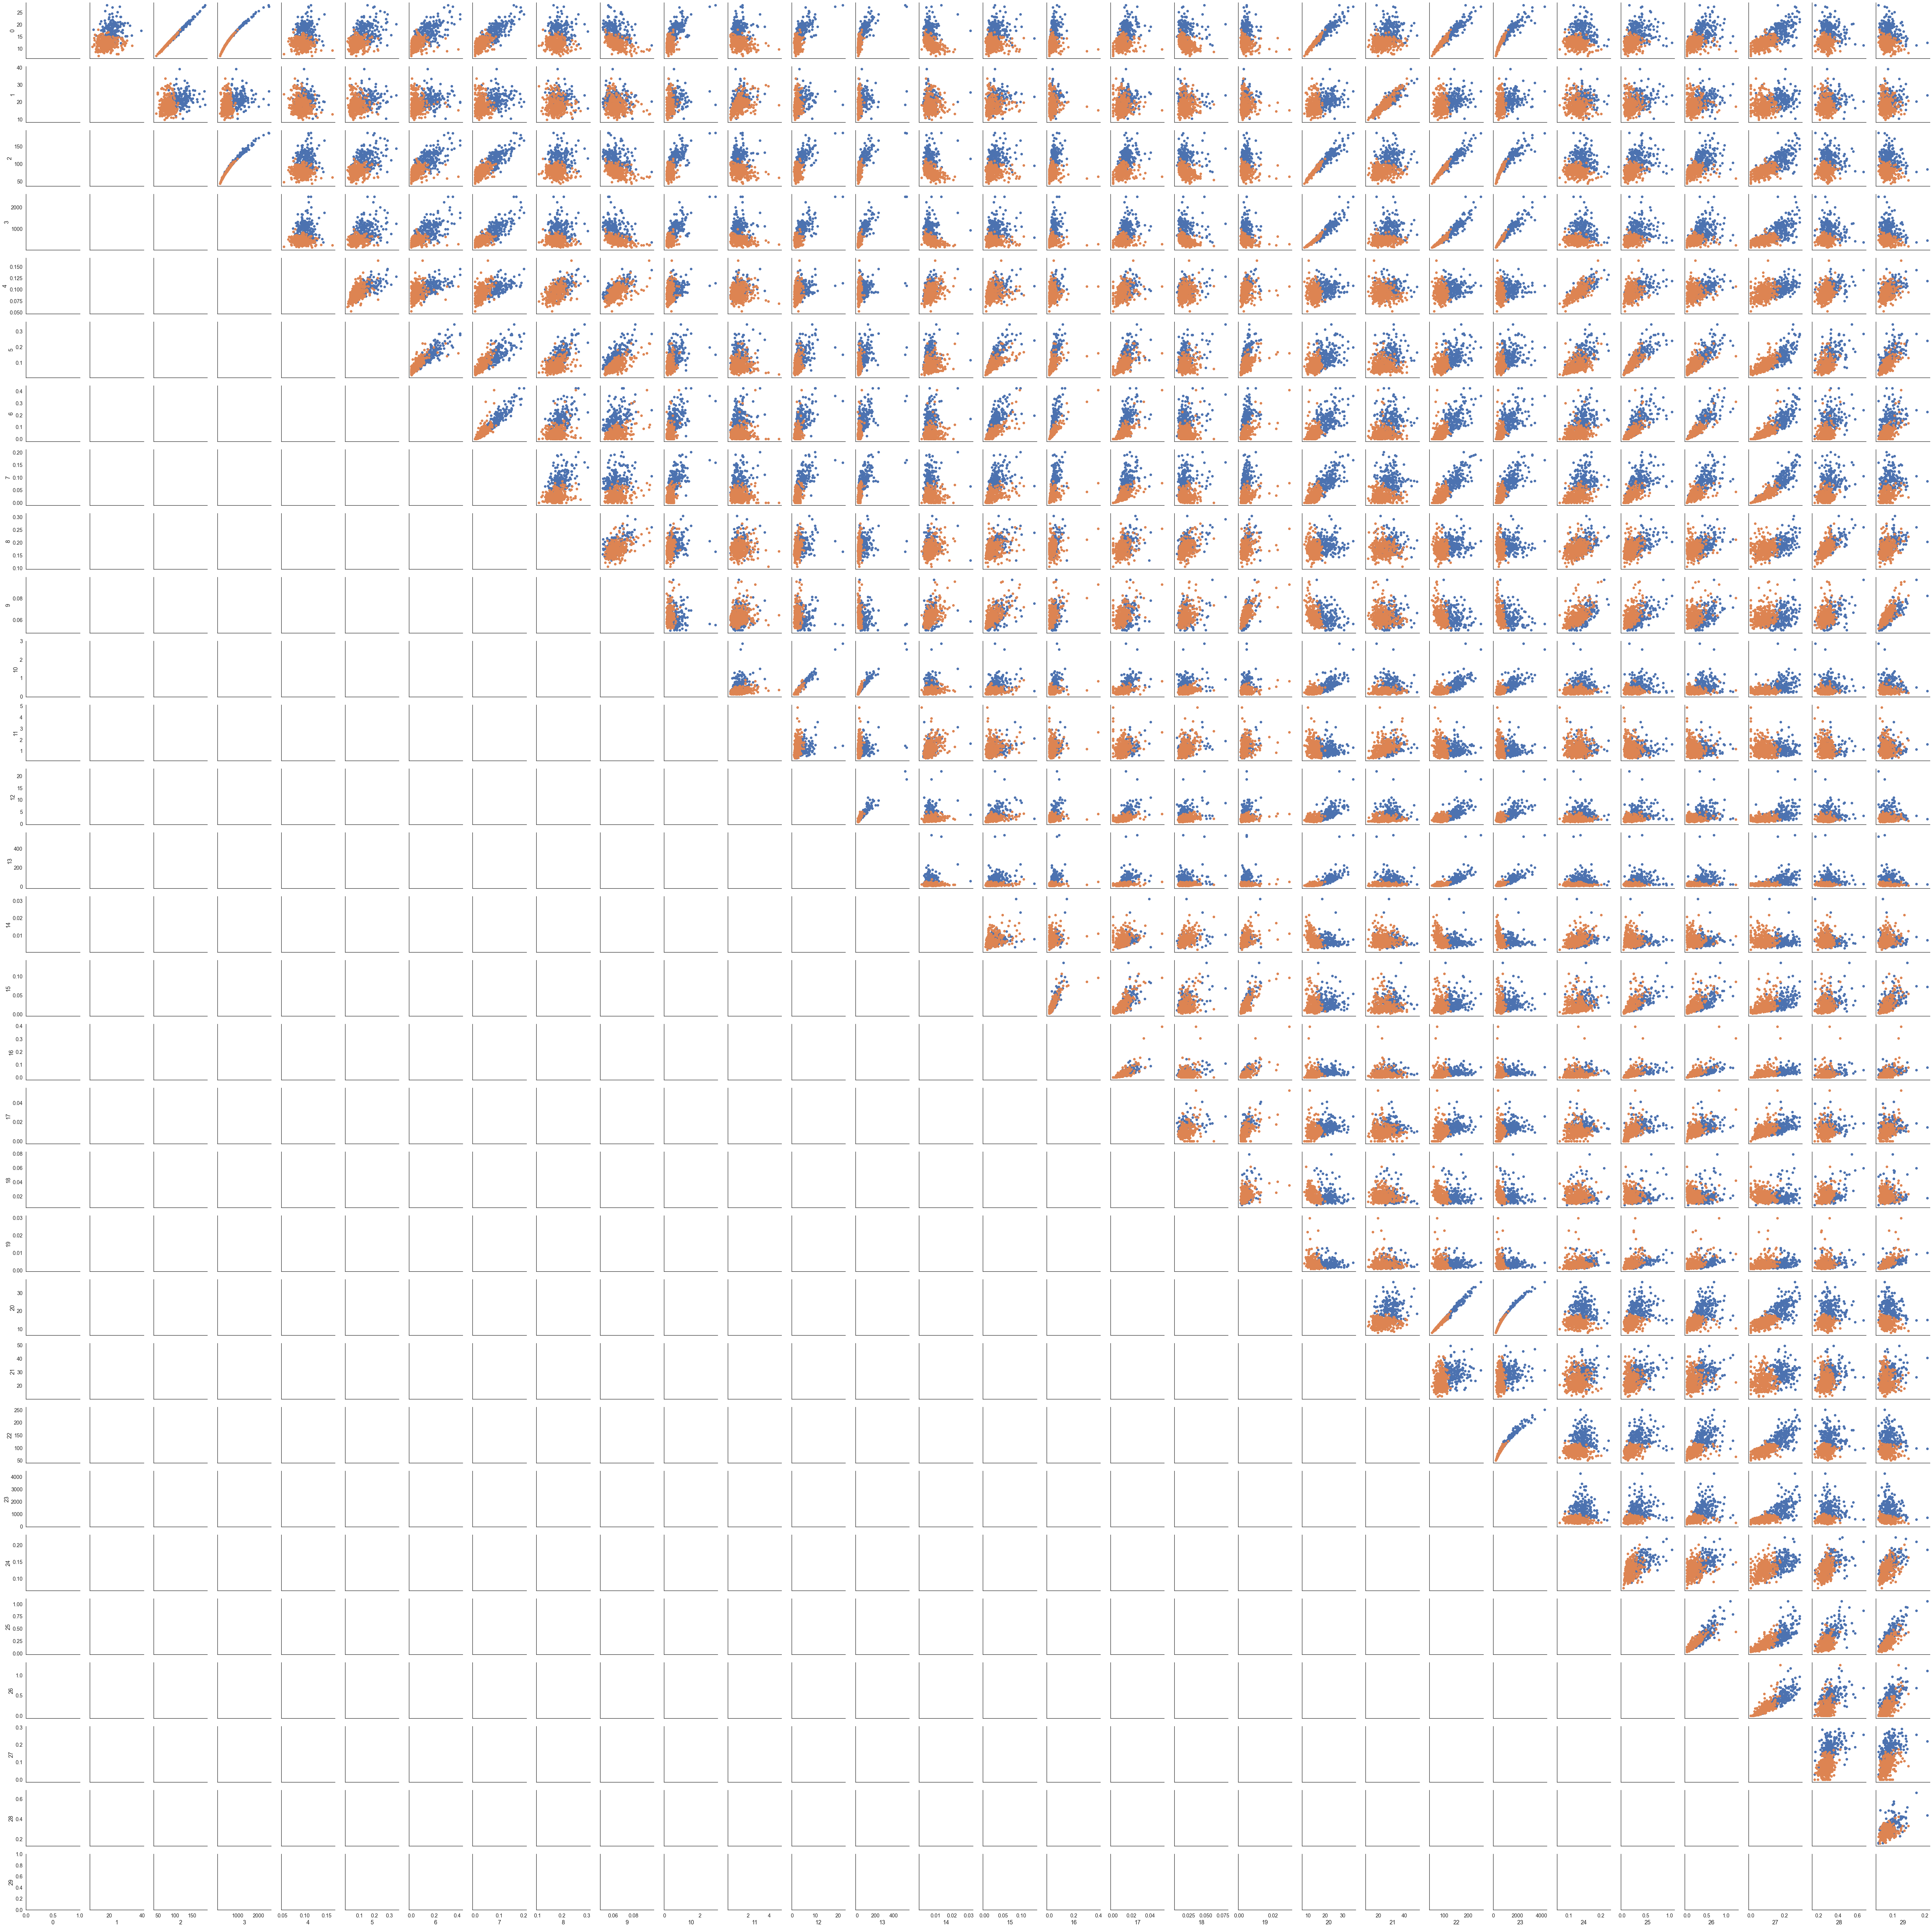

In [75]:
sns.set(style='white', font_scale=1.3)
df = pd.DataFrame(X)
df['class'] = y
g = sns.PairGrid(df, hue='class')
g.map_upper(plt.scatter)

In [76]:
model=GridSearchCV(KNeighborsClassifier(),{'n_neighbors': list(range(1,100))},scoring='f1')
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 10}

In [77]:
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91       109
           1       0.92      0.98      0.95       176

    accuracy                           0.93       285
   macro avg       0.94      0.92      0.93       285
weighted avg       0.94      0.93      0.93       285



In [78]:
def K(distance, h=0.05):
    ret = np.array(distance)/h
    return (1 - ret**2) * (np.abs(ret) <= 1)

In [79]:
from sklearn.metrics import accuracy_score

parameter_grid=ParameterGrid({'h': list(np.linspace(1,100))})
f1s=[]
for p in parameter_grid:
    model=KNeighborsClassifier(n_neighbors=len(X_train), weights=lambda x: K(x, p['h']))
    model.fit(X_train,y_train)
    f1s.append(accuracy_score(y_test,model.predict(X_test)))
p=parameter_grid[np.argmax(np.array(f1s))]
print(p)

{'h': 51.51020408163265}


In [80]:
model=KNeighborsClassifier(n_neighbors=len(X_train), weights=lambda x: K(x, p['h']))
model.fit(X_train,y_train)
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       109
           1       0.94      0.98      0.96       176

    accuracy                           0.95       285
   macro avg       0.95      0.94      0.94       285
weighted avg       0.95      0.95      0.95       285

